# **Correlation of IRL stats and FIFA ratings**

In [1]:
#@title **Player stats**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

def stat_corr(pos, season):

  players_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/Players_Clean.pkl')
  stats_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/stats_Clean.pkl')
  sofifa_ratings_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/sofifa_head_Clean.pkl')

  corr_df = pd.DataFrame(columns=None)

  players_df.reset_index(drop=True, inplace=True)

  terminate_players = players_df[(players_df['main_field_position'] != pos)].index
  players_df.drop(terminate_players, inplace=True)
  players_df.reset_index(drop=True, inplace=True)

  corr_df['tm_id'] = players_df['tm_id']

  stats_df.reset_index(drop=True, inplace=True)

  terminate_stats = stats_df[(stats_df['season'] != season) | (~stats_df['tm_id'].isin(corr_df['tm_id']))].index
  stats_df.drop(terminate_stats, inplace=True)
  stats_df.drop(columns=['club', 'season', 'competition'], inplace=True)
  stats_df.reset_index(drop=True, inplace=True)
  mean_stats = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.mean, fill_value=0)
  stats_df = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.sum, fill_value=0)
  stats_df['ppg'] = mean_stats['ppg'] / 100

  corr_df.set_index('tm_id', inplace=True)

  if(pos == 'goalkeepers'):
    corr_df[['app', 'cs', 'gc', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]\
        = stats_df[['app', 'cs', 'gc', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]
  else:
    corr_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]\
        = stats_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]

  terminate_corr = corr_df[\
                          (corr_df['ppg'].isna())].index

  corr_df.drop(terminate_corr, inplace=True)
  corr_df.reset_index(drop=True, inplace=True)
  plt.figure(figsize = (15, 10))
  corr = corr_df.corr()
  mapping = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True,
      annot = True
  )

def rate_corr(pos, season):

  players_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/Players_Clean.pkl')
  stats_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/stats_Clean.pkl')
  sofifa_ratings_df = pd.read_pickle('/content/drive/My Drive/Capstone/Data/Clean/sofifa_head_Clean.pkl')

  corr_df = pd.DataFrame(columns=None)

  players_df.reset_index(drop=True, inplace=True)

  terminate_players = players_df[(players_df['main_field_position'] != pos)\
                              | (players_df['sofifa_id'].isna())\
                              ].index
  players_df.drop(terminate_players, inplace=True)
  players_df.reset_index(drop=True, inplace=True)

  corr_df['tm_id'] = players_df['tm_id']

  corr_df['sf_id'] = players_df['sofifa_id']

  corr_df['sf_id'] = corr_df['sf_id'].astype(int)

  stats_df.reset_index(drop=True, inplace=True)

  terminate_stats = stats_df[(stats_df['season'] != season) | (~stats_df['tm_id'].isin(corr_df['tm_id']))].index
  stats_df.drop(terminate_stats, inplace=True)
  stats_df.drop(columns=['club', 'season', 'competition'], inplace=True)
  stats_df.reset_index(drop=True, inplace=True)
  mean_stats = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.mean, fill_value=0)
  stats_df = pd.pivot_table(stats_df, index='tm_id', columns='attribute', values='value', aggfunc=np.sum, fill_value=0)
  stats_df['ppg'] = mean_stats['ppg'] / 100

  corr_df.set_index('tm_id', inplace=True)

  if(pos == 'goalkeepers'):
    corr_df[['app', 'cs', 'gc', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]\
        = stats_df[['app', 'cs', 'gc', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]
  else:
    corr_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]\
        = stats_df[['app', 'a', 'g', 'mpg', 'mp', 'og', 'ppg', 'yc', 'syc', 'rc', 'son', 'soff', 's']]


  terminate_sofifa = sofifa_ratings_df[(sofifa_ratings_df['game_year'] != '20'+str(int(season[3:])+1)+'-01-01')\
      | (~sofifa_ratings_df['sofifa_id'].isin(corr_df['sf_id']))\
      ].index
  sofifa_ratings_df.drop(terminate_sofifa, inplace=True)

  sofifa_ratings_df.set_index('sofifa_id', inplace=True)
  corr_df.set_index('sf_id', drop=True, inplace=True)

  corr_df['rating'] = sofifa_ratings_df['overall']

  terminate_corr = corr_df[\
                          (corr_df['rating'].isna()) |\
                          (corr_df['ppg'].isna())].index

  corr_df.drop(terminate_corr, inplace=True)
  corr_df.reset_index(drop=True, inplace=True)

  corr = corr_df.corr()
  plt.figure(figsize = (15, 10))
  mapping = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True,
    annot = True
  )


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Appearances (app)
* Assists (a)
* Goals (g)
* Minutes per goal (mpg)
* Clean sheets (cs)
* Goals conceded (gc)
* Minutes played (mp)
* Own goals (og)
* Points per game (ppg)
* Yellow cards (yc)
* Second yellow cards (syc)
* Red cards (rc)
* Substitutions on (son)
* Substitutions off (soff)
* Squad inclusions (s)
* FIFA rating (rating)



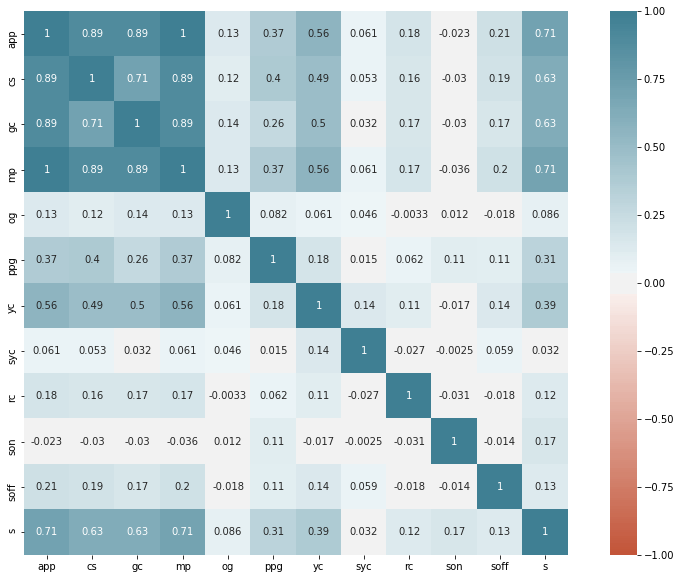

In [2]:
#@title **IRL stats correlation heatmap** { display-mode: "form" }
position = "goalkeepers" #@param ["goalkeepers", "defenders", "midfielders", "attackers"]
season = "14/15" #@param ["18/19", "17/18", "16/17", "15/16", "14/15", "13/14"]
stat_corr(position, season)

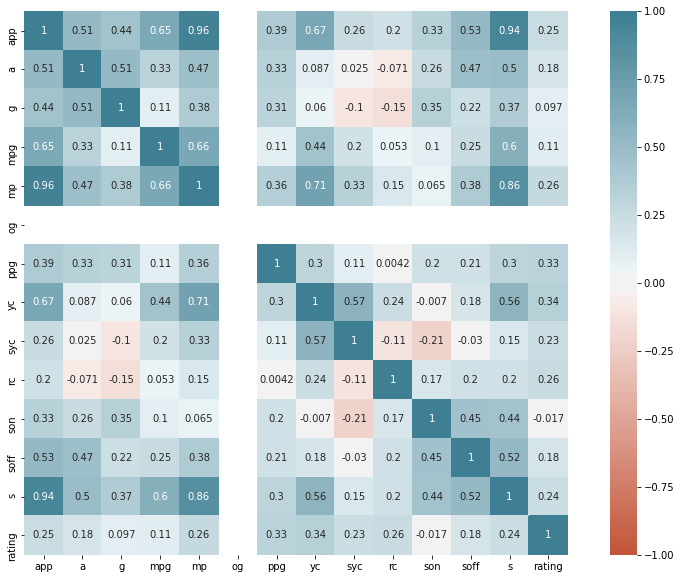

In [3]:
#@title **FIFA ratings correlation**
position = "midfielders" #@param ["goalkeepers", "defenders", "midfielders", "attackers"]
season = "14/15" #@param ["18/19", "17/18", "16/17", "15/16", "14/15", "13/14"]
rate_corr(position, season)